try vgg/ resnet

interpolation/spline

try cutting out latter half of each spectra and classifying on first half

change dropout to higher number 10-->20


https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/full/10.1002/jrs.5750  : this is transfer learning Raman paper with RRUFF implemented in past



In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
if torch.cuda.is_available():
  print('GPU available')

GPU available


In [ ]:
# import zipfile

# with zipfile.ZipFile('drive/My Drive/BTL Research/LR-Raman.zip', 'r') as zip_ref:
#     zip_ref.extractall('drive/My Drive/BTL Research/Minerals')


In [ ]:
import os
from collections import defaultdict

def group_files_by_prefix(directory):
    # Create a default dictionary to store the grouped files
    grouped_files = defaultdict(list)
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Split the file name by the underscore character
        parts = filename.split("_")
        # If the file name contains an underscore
        if len(parts) > 1:
            # The word before the underscore is the prefix
            prefix = parts[0]
            # Add the file to the group with the matching prefix
            grouped_files[prefix].append(filename)
    return grouped_files

# Usage example
num_per_class = 40
files = group_files_by_prefix("drive/My Drive/BTL Research/Minerals")
print(len(files))
for prefix, group in list(files.items()):
    if len(group) < num_per_class:
      files.pop(prefix, None)
print(len(files))
num_classes = len(files)
print(files)

# for key, value in list(my_dict.items()):
#     # Check if the length of the list is less than 4
#     if len(value) < 4:
#         # Remove the key-value pair from the dictionary
#         my_dict.pop(key, None)

# print(my_dict)


2233
4
defaultdict(<class 'list'>, {'Grossular': ['Grossular__R141207__Broad_Scan__532__0__unoriented__Raman_Data_Processed__24318.txt', 'Grossular__R141207__Broad_Scan__780__0__unoriented__Raman_Data_Processed__24319.txt', 'Grossular__R100146__Broad_Scan__532__0__unoriented__Raman_Data_RAW__21669.txt', 'Grossular__R100146__Broad_Scan__780__0__unoriented__Raman_Data_RAW__21668.txt', 'Grossular__R100152__Broad_Scan__532__0__unoriented__Raman_Data_RAW__21700.txt', 'Grossular__R100152__Broad_Scan__780__0__unoriented__Raman_Data_RAW__21701.txt', 'Grossular__R100160__Broad_Scan__532__0__unoriented__Raman_Data_RAW__21718.txt', 'Grossular__R100160__Broad_Scan__780__0__unoriented__Raman_Data_RAW__21719.txt', 'Grossular__R100161__Broad_Scan__532__0__unoriented__Raman_Data_RAW__21774.txt', 'Grossular__R100161__Broad_Scan__780__0__unoriented__Raman_Data_RAW__21775.txt', 'Grossular__R060278__Broad_Scan__532__0__unoriented__Raman_Data_RAW__19632.txt', 'Grossular__R060278__Broad_Scan__780__0__unorie

This script will return a dictionary where the keys are the prefixes, and the values are lists of files that have that prefix in their name.
Please note that it will not work on hidden files or folders.
It will also not work on file without the separator "_"
Please adjust accordingly to your use case.

In [ ]:
import math
import numpy as np

fraction = 1
def split_file_into_tenths(file_name):
    if not os.path.isfile(file_name):
        raise Exception(f"{file_name} not found.")
    with open(file_name, 'r') as f:
        lines = f.readlines()

    lines = [line for line in lines if not line.startswith('#')]
    data = [line.strip().split(',') for line in lines]

    tenths = []
    
    tenth = len(data) // fraction
    for i in range(fraction):
        start = i * tenth
        end = start + tenth
        data_tenth = data[start:end]

        tenths.append(data_tenth)
        # tenths.append(np.array([[x[0] for x in data_tenth if len(x)==2], [x[1] for x in data_tenth if len(x)==2]], dtype=np.float32))

    return tenths


split_data = split_file_into_tenths('drive/My Drive/BTL Research/Minerals/Mimetite__R130731__Broad_Scan__532__0__unoriented__Raman_Data_RAW__12237.txt')
for i, data in enumerate(split_data):
    print(f"Tenth {i+1}:\n{data}\n")



Tenth 1:
[['122.6892', ' 2855.960'], ['124.6177', ' 3213.072'], ['126.5461', ' 3517.760'], ['128.4746', ' 3767.172'], ['130.4031', ' 3947.476'], ['132.3315', ' 4109.111'], ['134.2600', ' 4263.842'], ['136.1885', ' 4405.523'], ['138.1169', ' 4565.930'], ['140.0454', ' 4753.021'], ['141.9739', ' 4958.351'], ['143.9023', ' 5167.793'], ['145.8308', ' 5404.272'], ['147.7593', ' 5624.636'], ['149.6877', ' 5803.556'], ['151.6162', ' 5922.583'], ['153.5447', ' 6049.203'], ['155.4731', ' 6188.056'], ['157.4016', ' 6338.336'], ['159.3301', ' 6517.231'], ['161.2585', ' 6743.705'], ['163.1870', ' 6986.590'], ['165.1155', ' 7234.347'], ['167.0439', ' 7518.409'], ['168.9724', ' 7743.628'], ['170.9009', ' 7891.780'], ['172.8293', ' 7957.401'], ['174.7578', ' 7953.071'], ['176.6863', ' 7867.076'], ['178.6147', ' 7710.517'], ['180.5432', ' 7515.448'], ['182.4717', ' 7269.135'], ['184.4001', ' 6989.102'], ['186.3286', ' 6680.269'], ['188.2571', ' 6323.613'], ['190.1855', ' 5973.005'], ['192.1140', ' 562

In [ ]:
len(split_data[0])

3359

In [ ]:
root_dir = 'drive/My Drive/BTL Research/Minerals/'
key_ind = 0
mother_list = []
mother_labels = []
for key, value in files.items():
  key_ind += 1
  for item in value:
    split_data = split_file_into_tenths(root_dir + item)

    for i, data in enumerate(split_data):
      # print(f"Tenth {i+1}:\n{data}\n")
      mother_list.append(data)
  points_in_class = len(split_data)*len(value)
  # print(points_in_class)
  mother_labels.append(points_in_class)

 
    

In [ ]:
print(mother_labels)
len(mother_list)

[49, 45, 42, 41]


177

In [ ]:
import numpy as np
y_data = []
class_grouping = num_classes // 5 #6 in this case is class_grouping

for index, value in enumerate(mother_labels):
  y_data.append(index*np.ones(value))
y_data = np.concatenate(y_data, axis=0)

# mapping = {0:0, 1:1, 2:2, 3:3, 4:4, 5:0, 6:1, 7:2, 8:3, 9:4, 
#            10:0, 11:1, 12:2, 13:3, 14:4, 15:0, 16:1, 17:2, 18:3, 19:4,
#            20:0, 21:1, 22:2, 23:3, 24:4, 25:0, 26:1, 27:2, 28:3, 29:4}

# # Using the mapping to create the new array
# y_data = np.array([mapping[x] for x in y_data])

#hard code differentiation of classes
# y_data[y_data <10] = 0
# y_data[(y_data>=10) & (y_data<20)] = 1
# y_data[y_data>=20] = 2
  
y_data.shape

(177,)

In [ ]:
np.unique(y_data)


array([0., 1.])

In [ ]:
# list_len = [len(i) for i in mother_list]
# max_len = max(list_len)
# # padded_lists = [[lst[0]]*(max_len-len(lst))+lst for lst in mother_list]
# print(list_len)
# # new_x_data = np.stack(mother_list, axis=0)

In [ ]:
mother_lists = [[x for x in inner_list if len(x) == 2] for inner_list in mother_list]

list_len = [len(i) for i in mother_lists]
max_len = max(list_len)
min_len = min(list_len)
padded_lists = [[lst[0]]*(max_len-len(lst))+lst for lst in mother_lists]
# padded_lists = [lst[:min_len] for lst in mother_lists]
# print(min_len, len(padded_lists), len(padded_lists[0]))


In [ ]:
new_x_data = [np.array([[x[0] for x in inner_list], [x[1] for x in inner_list]], dtype=np.float32) for inner_list in padded_lists]
new_x_data = np.stack(new_x_data, axis=0)
print(new_x_data.shape)

(177, 2, 3397)


In [ ]:
X_data = np.squeeze(np.array(new_x_data[:, 1, :]))
X_data.shape

(177, 3397)

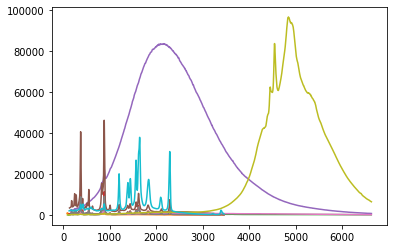

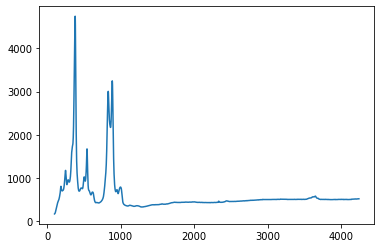

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.plot(new_x_data[i, 0, :], new_x_data[i, 1, :])
plt.show()

plt.plot(new_x_data[0, 0, :], new_x_data[0, 1, :])


In [ ]:
#min-max normalization by each spectra instead of by each chunk
num_groups = int(X_data.shape[0] / fraction)

for i in range(num_groups):
  start = i * fraction
  end = start + fraction
  group = X_data[start:end]

  group_min = np.min(group)
  group_max = np.max(group)

  norm_group = (group - group_min) / (group_max - group_min)
  X_data[start:end] = norm_group

# X_data = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))


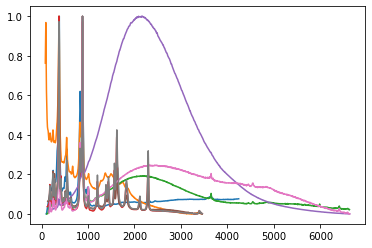

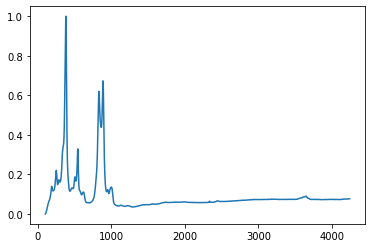

In [ ]:
import matplotlib.pyplot as plt
for i in range(8):
  plt.plot(new_x_data[i, 0, :], X_data[i, :])
plt.show()

plt.plot(new_x_data[0, 0, :], X_data[0, :])


In [ ]:
import torch
import torchvision.models as models
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler    
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler


In [ ]:
# This is waveform based min-max norming, which is good if DNR is about similar for all spectra, remember to transpose accordingly, like in train_test_split and num_features
# X_data = (X_data.T - X_data.min(axis=1)) / (X_data.max(axis=1) - X_data.min(axis=1))


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_data, y_data, test_size=0.25, stratify=y_data.reshape(y_data.shape[0]), shuffle=True, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, shuffle=True, random_state=21)


In [ ]:
# this is feature normalization, which is not a good idea since it's normalizaing features and messing up waveform shapes for each data point
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

# X_train, y_train = np.array(X_train), np.array(y_train)
# X_val, y_val = np.array(X_val), np.array(y_val)
# X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
class DataAccess():

    # This library is used to refer the data index and load the data during training

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index, :], self.y_data[index]

    def __len__(self):
        return len(self.X_data)

In [ ]:
train_dataset = DataAccess(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = DataAccess(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = DataAccess(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())


In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
class_count = [i for i in counts.values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

class_weights_all = class_weights[target_list]

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

tensor([0.0370, 0.0385, 0.0435, 0.0435])


In [ ]:
EPOCHS = 300
BATCH_SIZE = 40 #back to 40
LEARNING_RATE = 0.001
NUM_FEATURES = X_data.shape[1]
NUM_CLASSES = 4 #get from num_per_class cell, should be 4 for final deploy


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, sampler=weighted_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_dataset, batch_size=100)


if (torch.cuda.is_available()):
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")



In [ ]:
class Raman_CNN(torch.nn.Module):
    def __init__(self, numChannels, classes, inputdim): #here numchannels is input dimension or wavelengths in spectra
        super(Raman_CNN, self).__init__()
        # self.layer1 = nn.LazyLinear(8)
        self.conv1 = nn.Conv1d(in_channels=numChannels, out_channels=16, kernel_size= 12)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size= 12)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size= 12)
        self.conv4 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size= 12)

        self.fc = nn.LazyLinear(500) #all wavelengths * numchannels? Lazy Linear infers in_features
        self.fc2 = nn.Linear(500, classes) #1 if binary cross entropy
        self.dropout = nn.Dropout(p=.5) #change to .5
        self.input_dim = inputdim
        # self.batch_norm = nn.BatchNorm1d(inputdim)
        # self.x = x.view(x.shape[0], 1, self.input_dim)
        # self.reshape = 
    
    def forward(self, x):
        # if x.shape[1] !=1:
        # x = x.view(x.shape[0], 1, self.input_dim) #do this to get it into shape of batch, channels, dimension of spectra
        # x = self.layer1(x)
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.maxpool(self.relu(self.conv3(x)))
        x = self.maxpool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.dropout(self.fc(x)))
        out = self.fc2(x)

        return out

In [ ]:
model = Raman_CNN(1, NUM_CLASSES, NUM_FEATURES) # change in and out features size depending on data used and type of classification
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)


In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}




Epoch 001: | Train Loss: 1.37647 | Val Loss: 1.36019 | Train Acc: 30.667| Val Acc: 24.000
Epoch 002: | Train Loss: 1.38623 | Val Loss: 1.33390 | Train Acc: 22.667| Val Acc: 45.000
Epoch 003: | Train Loss: 1.25040 | Val Loss: 1.27375 | Train Acc: 44.000| Val Acc: 27.000
Epoch 004: | Train Loss: 1.28342 | Val Loss: 1.12838 | Train Acc: 47.333| Val Acc: 42.000
Epoch 005: | Train Loss: 1.14667 | Val Loss: 1.12028 | Train Acc: 45.000| Val Acc: 42.000
Epoch 006: | Train Loss: 1.06494 | Val Loss: 1.12062 | Train Acc: 45.000| Val Acc: 64.000
Epoch 007: | Train Loss: 1.17950 | Val Loss: 1.13956 | Train Acc: 47.333| Val Acc: 58.000
Epoch 008: | Train Loss: 1.03658 | Val Loss: 1.06624 | Train Acc: 51.000| Val Acc: 70.000
Epoch 009: | Train Loss: 0.88879 | Val Loss: 1.03772 | Train Acc: 64.000| Val Acc: 48.000
Epoch 010: | Train Loss: 0.91212 | Val Loss: 0.95500 | Train Acc: 67.667| Val Acc: 48.000
Epoch 011: | Train Loss: 0.85353 | Val Loss: 0.94136 | Train Acc: 65.667| Val Acc: 55.000
Epoch 012:

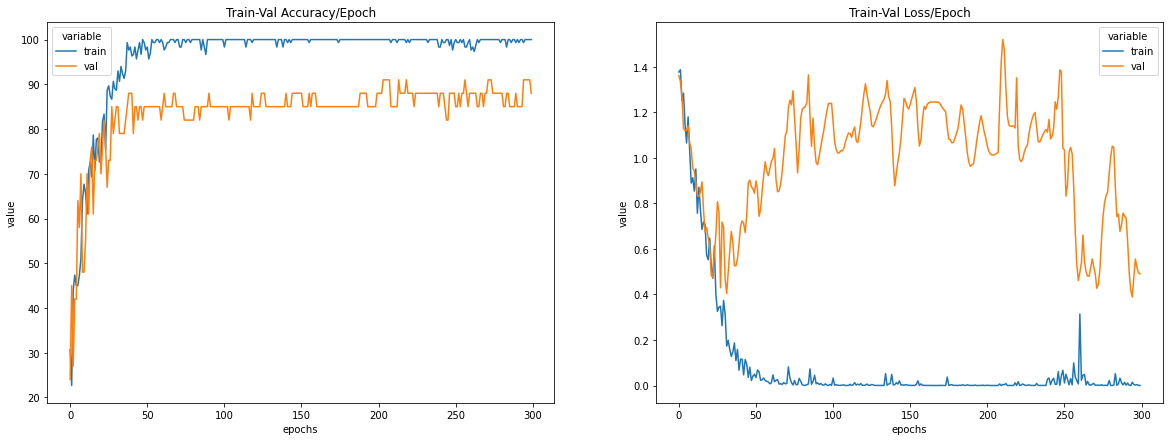

In [ ]:
import pandas as pd
import seaborn as sns
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        X_train_batch = X_train_batch.view(X_train_batch.shape[0], 1, NUM_FEATURES)
        y_train_pred = model(X_train_batch)
        # y_train_pred = model(X_train_batch.view(X_train_batch.shape[0], 1, X_train_batch.shape[1]))
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            X_val_batch = X_val_batch.view(X_val_batch.shape[0], 1, NUM_FEATURES)

            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
plt.show()


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



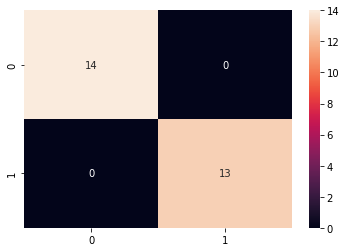

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

y_pred_list = []
y_proba_list = []

with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        X_batch = X_batch.view(X_batch.shape[0], 1, NUM_FEATURES)

        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1) 
        probabilities = nn.functional.softmax(y_test_pred, dim=1)[:, 1]
        for i in range(y_pred_tags.shape[0]):
            y_pred_list.append(y_pred_tags[i].cpu().numpy())

        y_proba_list.append(probabilities.detach().cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_proba_list = [a.squeeze().tolist() for a in y_proba_list]


confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list))

sns.heatmap(confusion_matrix_df, annot=True)

print(classification_report(y_test, y_pred_list))

plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/BTL Research/torch_mod.pth')

# Re-Load Saved Model

In [ ]:
model = Raman_CNN(1, 4, 3397)
model.load_state_dict(torch.load('/content/drive/MyDrive/BTL Research/torch_mod.pth', map_location=torch.device('cpu')))


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [ ]:
model.fc2 = nn.Linear(500,2) 
# model.input_dim = 420

In [ ]:
for param in model.parameters():
    param.requiresGrad = False

for param in model.fc2.parameters():
  param.requiresGrad = True


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc2.parameters(), lr = .0001)


#Preprocessing collected data 


In [ ]:
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from BaselineRemoval import BaselineRemoval
import matplotlib.pyplot as plt
import sys, os

(512,)
(54, 420)
(54, 420)


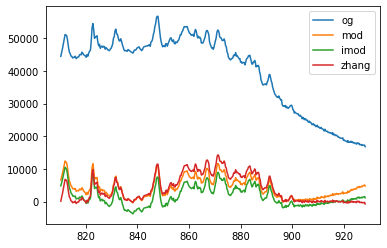

In [ ]:
folder = "/content/drive/MyDrive/BTL Research/Phantom_Samples"
arr = []
wv = []
with open(folder+'/GNS-ICG_785nm_High_100msint.csv', 'r') as new_file:
    for i, line in enumerate(new_file):
        if i>0:
            wv.append((float(line.split(',')[0].strip("\""))))
            new_arr = []
            for j in range(len(line.split(","))):
                if j % 2 == 1:
                    new_arr.append(int(line.split(',')[j].strip("\"").strip('"\n')))

            arr.append(new_arr)
            
arr = np.array(arr).T
wv = np.array(wv)

print(wv.shape)


cutoff = 810

wv_n = wv[wv>cutoff]
wavenumber = 10e7/wv_n
index = wv > cutoff
arr_n = arr[:, index]
print(arr_n.shape)
# print(wv_n, arr_n)

mod_arr = []
imod_arr = []
zha_arr = []
for ind, val in enumerate(arr_n):
    baseObj=BaselineRemoval(arr_n[ind])


    Modpoly_output=baseObj.ModPoly(3)
    mod_arr.append(Modpoly_output)

    Imodpoly_output=baseObj.IModPoly(3)
    imod_arr.append(Imodpoly_output)

    Zhangfit_output=baseObj.ZhangFit()
    zha_arr.append(Zhangfit_output)

mod_arr = np.array(mod_arr)
imod_arr = np.array(imod_arr)
zha_arr = np.array(zha_arr)
print(mod_arr.shape)




plt.figure()
plt.plot(wv_n, arr_n[53], label='og')
plt.plot(wv_n, mod_arr[53], label='mod')
plt.plot(wv_n, Imodpoly_output, label='imod')
plt.plot(wv_n, Zhangfit_output, label='zhang')
plt.legend()
plt.show()




(100, 512)
(512,)
(100, 433)
(100, 433)


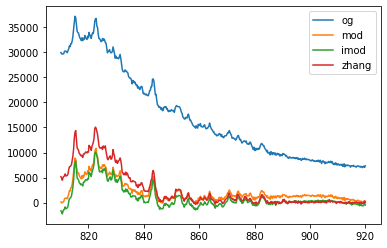

In [ ]:
folder = "/content/drive/MyDrive/BTL Research/Phantom_Samples"
arr = []
wv = []
# with open(folder+'/Cy_75_2.csv', 'r') as new_file:
#     for i, line in enumerate(new_file):
#         if i>0:
#             wv.append((float(line.split(',')[0].strip("\""))))
#             new_arr = []
#             for j in range(len(line.split(","))):
#                 if j % 2 == 1:
#                     new_arr.append(int(line.split(',')[j].strip("\"").strip('"\n')))

#             arr.append(new_arr)
# arr = np.array(arr).T
# wv = np.array(wv)

with open(folder+'/Cy_75_2.csv', 'r') as new_file:
    for i, line in enumerate(new_file):
        if i>0:
            new_arr = []
            for j in range(len(line.split(','))):
                new_arr.append(float(line.split(',')[j]))
            arr.append(new_arr)

arr = np.array(arr).T[2:, :]
wv = np.linspace(790,920,512)
print(arr.shape)
print(wv.shape)


cutoff = 810

wv_n = wv[wv>cutoff]
wavenumber = 10e7/wv_n
index = wv > cutoff
arr_n = arr[:, index]
print(arr_n.shape)
# print(wv_n, arr_n)

modn_arr = []
imod_arr = []
zha_arr = []
for ind, val in enumerate(arr_n):
    baseObj=BaselineRemoval(arr_n[ind])


    Modpoly_output=baseObj.ModPoly(3)
    modn_arr.append(Modpoly_output)

    Imodpoly_output=baseObj.IModPoly(3)
    imod_arr.append(Imodpoly_output)

    Zhangfit_output=baseObj.ZhangFit()
    zha_arr.append(Zhangfit_output)

modn_arr = np.array(modn_arr)
imod_arr = np.array(imod_arr)
zha_arr = np.array(zha_arr)
print(modn_arr.shape)



plt.figure()
plt.plot(wv_n, arr_n[53], label='og')
plt.plot(wv_n, modn_arr[53], label='mod')
plt.plot(wv_n, Imodpoly_output, label='imod')
plt.plot(wv_n, Zhangfit_output, label='zhang')
plt.legend()
plt.show()




(512,)
(100, 433)
(100, 433)


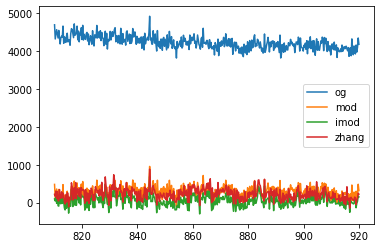

In [ ]:
arr = []
wv = []
# with open(folder+'/Agarose_785nm_High_100msint.csv', 'r') as new_file:
#     for i, line in enumerate(new_file):
#         if i>0:
#             wv.append((float(line.split(',')[0].strip("\""))))
#             new_arr = []
#             for j in range(len(line.split(","))):
#                 if j % 2 == 1:
#                     new_arr.append(int(line.split(',')[j].strip("\"").strip('"\n')))

#             arr.append(new_arr)
            
# arr = np.array(arr).T
# wv = np.array(wv)

with open(folder+'/Control_2.csv', 'r') as new_file:
    for i, line in enumerate(new_file):
        if i>0:
            new_arr = []
            for j in range(len(line.split(','))):
                new_arr.append(float(line.split(',')[j]))
            arr.append(new_arr)

arr = np.array(arr).T[2:, :]
wv = np.linspace(790,920,512)

print(wv.shape)


cutoff = 810

wv_n = wv[wv>cutoff]
wavenumber = 10e7/wv_n
index = wv > cutoff
arr_n = arr[:, index]
print(arr_n.shape)
# print(wv_n, arr_n)

modl_arr = []
imod_arr = []
zha_arr = []
for ind, val in enumerate(arr_n):
    baseObj=BaselineRemoval(arr_n[ind])


    Modpoly_output=baseObj.ModPoly(3)
    modl_arr.append(Modpoly_output)

    Imodpoly_output=baseObj.IModPoly(3)
    imod_arr.append(Imodpoly_output)

    Zhangfit_output=baseObj.ZhangFit()
    zha_arr.append(Zhangfit_output)

modl_arr = np.array(modl_arr)
imod_arr = np.array(imod_arr)
zha_arr = np.array(zha_arr)
print(modl_arr.shape)



plt.figure()
plt.plot(wv_n, arr_n[53], label='og')
plt.plot(wv_n, modl_arr[53], label='mod')
plt.plot(wv_n, Imodpoly_output, label='imod')
plt.plot(wv_n, Zhangfit_output, label='zhang')
plt.legend()
plt.show()

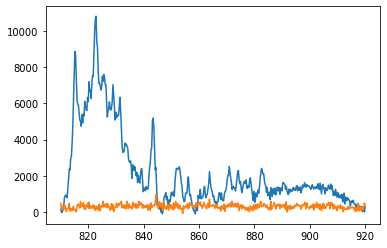

In [ ]:
x_new = np.linspace(np.min(wv_n), np.max(wv_n), 3397)
interp_array = []
interpn_array = []
interpl_array = []
# for ind, val in enumerate(mod_arr):
#   interp_array.append(np.interp(x_new, wv_n, val)) #appending on long axis, incorrect
for index, value in enumerate(modn_arr):
  interpn_array.append(np.interp(x_new, wv_n, value))
for indexes, values in enumerate(modl_arr):
  interpl_array.append(np.interp(x_new, wv_n, values))
# plt.plot(x_new, interp_array[53])
plt.plot(x_new, interpn_array[53])
plt.plot(x_new, interpl_array[53])
# interp_array = np.stack(interp_array, axis=1).T
# print(interp_array.shape)



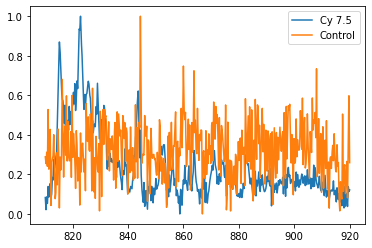

In [ ]:
for i in range(54):
  # interp_array[i] = (interp_array[i]-np.min(interp_array[i]))/(np.max(interp_array[i])-np.min(interp_array[i]))
  interpn_array[i] = (interpn_array[i]-np.min(interpn_array[i]))/(np.max(interpn_array[i])-np.min(interpn_array[i]))
  interpl_array[i] = (interpl_array[i]-np.min(interpl_array[i]))/(np.max(interpl_array[i])-np.min(interpl_array[i]))

plt.plot(x_new, interpn_array[1], label='Cy 7.5')
# plt.plot(x_new, interp_array[1], label='ICG')
plt.plot(x_new, interpl_array[1], label='Control')
plt.legend()

# Model Implementation

In [ ]:
X_data = np.concatenate((interpn_array, interpl_array), axis=0)
y_data = np.concatenate((np.zeros(modn_arr.shape[0]), np.ones(modl_arr.shape[0])), axis=0)


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_data, y_data, test_size=0.25, stratify=y_data.reshape(y_data.shape[0]), shuffle=True, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, shuffle=True, random_state=21)


In [ ]:
train_dataset = DataAccess(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = DataAccess(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = DataAccess(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())


In [ ]:
#if needed, weighted random sampler creation
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
class_count = [i for i in counts.values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

class_weights_all = class_weights[target_list]

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

tensor([0.0179, 0.0179])


In [ ]:
EPOCHS = 150
BATCH_SIZE = 8
LEARNING_RATE = 0.001
NUM_FEATURES = X_data.shape[1]
NUM_CLASSES = 2


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=int(BATCH_SIZE/2))
test_loader = DataLoader(dataset=test_dataset, batch_size=2)


if (torch.cuda.is_available()):
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")



In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}




Epoch 001: | Train Loss: 479.04870 | Val Loss: 211.47539 | Train Acc: 39.429| Val Acc: 47.500
Epoch 002: | Train Loss: 569.85475 | Val Loss: 225.45031 | Train Acc: 51.929| Val Acc: 47.500
Epoch 003: | Train Loss: 480.01657 | Val Loss: 226.02999 | Train Acc: 49.143| Val Acc: 47.500
Epoch 004: | Train Loss: 595.02909 | Val Loss: 222.47470 | Train Acc: 51.714| Val Acc: 47.500
Epoch 005: | Train Loss: 354.43575 | Val Loss: 205.28530 | Train Acc: 46.500| Val Acc: 47.500
Epoch 006: | Train Loss: 377.27211 | Val Loss: 179.93991 | Train Acc: 58.857| Val Acc: 47.500
Epoch 007: | Train Loss: 229.85594 | Val Loss: 149.73153 | Train Acc: 60.714| Val Acc: 47.500
Epoch 008: | Train Loss: 348.45971 | Val Loss: 120.95585 | Train Acc: 56.071| Val Acc: 47.500
Epoch 009: | Train Loss: 393.67953 | Val Loss: 126.70542 | Train Acc: 61.500| Val Acc: 47.500
Epoch 010: | Train Loss: 422.75591 | Val Loss: 116.82690 | Train Acc: 53.429| Val Acc: 47.500
Epoch 011: | Train Loss: 361.27430 | Val Loss: 97.68590 | Tr

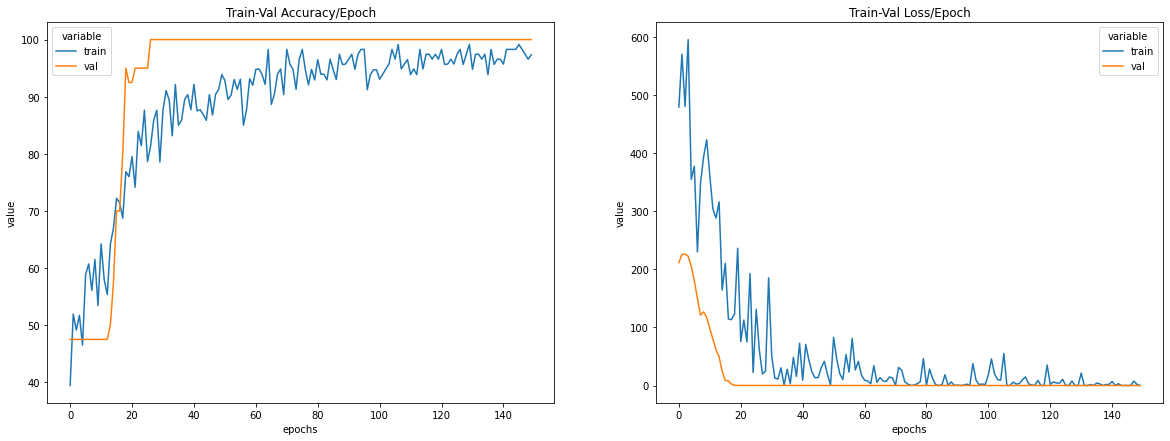

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        # X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        X_train_batch = X_train_batch.view(X_train_batch.shape[0], 1, NUM_FEATURES)

        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            # X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            X_val_batch = X_val_batch.view(X_val_batch.shape[0], 1, NUM_FEATURES)

            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
plt.show()


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



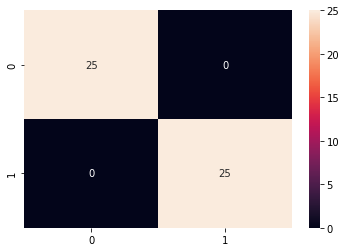

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


y_pred_list = []
y_proba_list = []

with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        # X_batch = X_batch.to(device)
        X_batch = X_batch.view(X_batch.shape[0], 1, NUM_FEATURES)

        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1) 
        probabilities = nn.functional.softmax(y_test_pred, dim=1)[:, 1]
        for i in range(y_pred_tags.shape[0]):
            y_pred_list.append(y_pred_tags[i].cpu().numpy())

        y_proba_list.append(probabilities.detach().cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_proba_list = [a.squeeze().tolist() for a in y_proba_list]


confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list))

sns.heatmap(confusion_matrix_df, annot=True)

print(classification_report(y_test, y_pred_list))

plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/BTL Research/transfer_deploy_2class_new.pth')

# Load Model and predict on New Unlabeled Data

(512,)
(22, 420)
(22, 420)


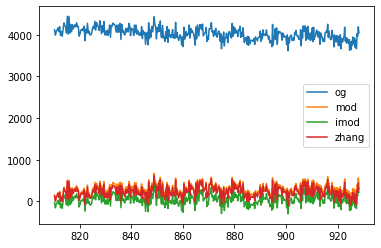

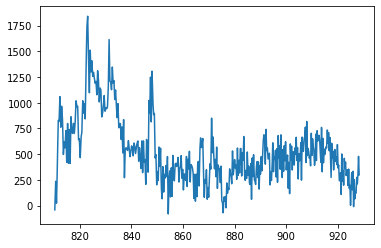

(22, 3397)


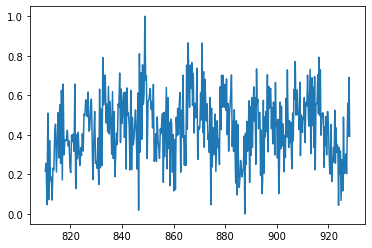

In [ ]:
import numpy as np
from BaselineRemoval import BaselineRemoval
import matplotlib.pyplot as plt
import sys, os
folder = "/content/drive/MyDrive/BTL Research/Phantom_Samples/Final_Runs"
arr = []
wv = []
with open(folder+'/Run1.csv', 'r') as new_file:
    for i, line in enumerate(new_file):
        if i>0:
            wv.append((float(line.split(',')[0].strip("\""))))
            new_arr = []
            for j in range(len(line.split(","))):
                if j % 2 == 1:
                    new_arr.append(int(line.split(',')[j].strip("\"").strip('"\n')))

            arr.append(new_arr)
            
arr = np.array(arr).T
wv = np.array(wv)

print(wv.shape)


cutoff = 810

wv_n = wv[wv>cutoff]
wavenumber = 10e7/wv_n
index = wv > cutoff
arr_n = arr[:, index]
print(arr_n.shape)
# print(wv_n, arr_n)

mod_arr = []
imod_arr = []
zha_arr = []
for ind, val in enumerate(arr_n):
    baseObj=BaselineRemoval(arr_n[ind])


    Modpoly_output=baseObj.ModPoly(3)
    mod_arr.append(Modpoly_output)

    Imodpoly_output=baseObj.IModPoly(3)
    imod_arr.append(Imodpoly_output)

    Zhangfit_output=baseObj.ZhangFit()
    zha_arr.append(Zhangfit_output)

mod_arr = np.array(mod_arr)
imod_arr = np.array(imod_arr)
zha_arr = np.array(zha_arr)
print(mod_arr.shape)




plt.figure()
plt.plot(wv_n, arr_n[21], label='og')
plt.plot(wv_n, mod_arr[21], label='mod')
plt.plot(wv_n, Imodpoly_output, label='imod')
plt.plot(wv_n, Zhangfit_output, label='zhang')
plt.legend()
plt.show()


x_new = np.linspace(np.min(wv_n), np.max(wv_n), 3397)
interp_array = []

for ind, val in enumerate(mod_arr):
  interp_array.append(np.interp(x_new, wv_n, val)) #appending on long axis, incorrect

plt.figure()
plt.plot(x_new, interp_array[8])
plt.show()
# plt.plot(wv_n, arr_n[53])
interp_array = np.stack(interp_array, axis=1).T
print(interp_array.shape)


for i in range(22):
  interp_array[i] = (interp_array[i]-np.min(interp_array[i]))/(np.max(interp_array[i])-np.min(interp_array[i]))

plt.figure()
plt.plot(x_new, interp_array[1])
plt.show()



In [ ]:
if (torch.cuda.is_available()):
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
NUM_FEATURES = 3397

In [ ]:
# device = torch.device('cpu')

model = Raman_CNN(1, 3, 3397)
model.load_state_dict(torch.load('/content/drive/MyDrive/BTL Research/transfer_deploy_mod.pth'))
model.to(device)
new_data = torch.from_numpy(interp_array[5]).float()
new_data = new_data.to(device)
model.eval()

with torch.no_grad():
  output = model((new_data.view(1, 1, NUM_FEATURES)))

In [ ]:
prediction = int(torch.max(output.data, 1)[1].cpu().numpy())
print(prediction)

if (prediction == 0):
    print ('ICG')
if (prediction == 1):
    print ('Cy 7.5')
if (prediction==2):
    print('control')

1
Cy 7.5



# Online example with Resnet and ImageNet and New pics



In [ ]:
import torch
import torchvision.models as models
from torch import nn

# Load the pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requiresGrad = False

# Replace the fully connected layer with a new one
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Move the model to the GPU
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=learning_rate, momentum=momentum)

# Train the model
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss and accuracy for each epoch
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_acc = torch.sum(preds == labels.data) / len(labels)
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Validation Acc: {val_acc}")



NameError: ignored

This script loads a pre-trained ResNet-18 model from torchvision.models and freezes all the layers. Then it replaces the fully connected layer with a new one which have num_classes number of output classes. After that it moves the model to the GPU and defines a cross-entropy loss function and an optimizer. It then trains the model on the given dataset for the defined number of epochs.
You may replace resnet18 with resnet50 or resnet101 or other variations as per your requirement.
You should also be sure to replace train_loader, val_loader, num_classes, device and num_epochs with the appropriate values for your specific task.
Please keep in mind that this is a very general example and may require more adjustments to work correctly in your specific use case.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

In [ ]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


1/1 [==============================] - 0s 231ms/step


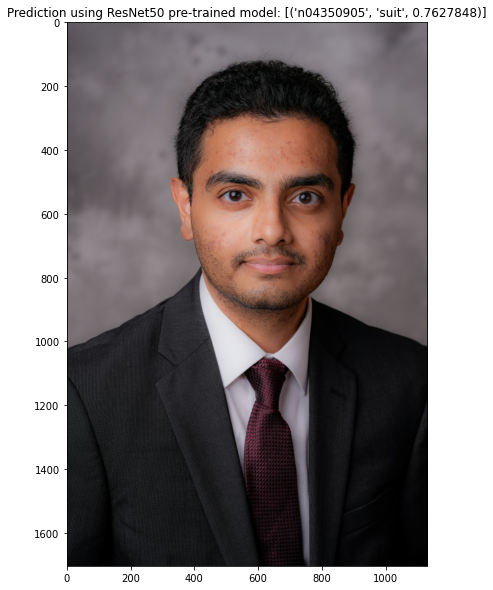

In [ ]:
img_path = '/content/Raman_Ashutosh_15457060.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Showing the image with prediction
plt.figure(figsize=(15,10))
img_bgr = cv2.imread(img_path, 1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);
plt.title('Prediction using ResNet50 pre-trained model: {}'.format(decode_predictions(preds, top=1)[0]));